In [116]:
import pandas as pd



In [117]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [118]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [119]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [120]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [121]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [122]:
 df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [123]:
df.count()

,0
v1,5572
v2,5572


In [124]:
df.shape

(5572, 2)

In [125]:
df.size

11144

In [126]:
df.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30


In [127]:
df.nunique()

,0
v1,2
v2,5169


In [128]:
import matplotlib.pyplot as plt

In [129]:
import seaborn as sns

In [130]:
df['v1'].value_counts()

,count
v1,
ham,4825
spam,747


In [131]:
df['v1'].value_counts().index

Index(['ham', 'spam'], dtype='object', name='v1')

In [132]:
df['v1'].value_counts().values

array([4825,  747])

In [133]:
label_df=df['v1'].value_counts().index

In [134]:
value_df=df['v1'].value_counts().values

([<matplotlib.patches.Wedge at 0x7ebe18dff910>,
 [Text(-1.0038715425384215, 0.4497131597824666, 'ham'),
  Text(1.0038714746336121, -0.44971331136284726, 'spam')],
 [Text(-0.547566295930048, 0.24529808715407267, '86.59%'),
  Text(0.5475662588910611, -0.24529816983428027, '13.41%')])

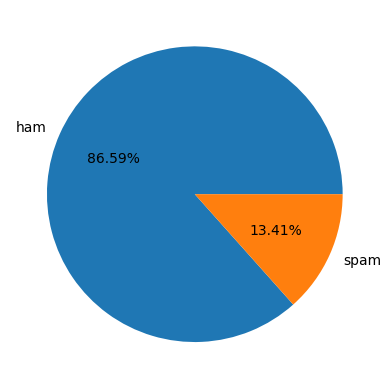

In [135]:
plt.pie(labels=label_df,x=value_df,autopct='%1.2f%%')

<Axes: xlabel='count', ylabel='v1'>

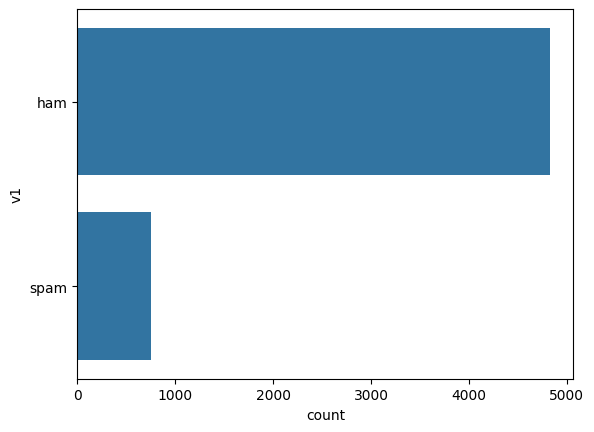

In [136]:
sns.countplot(df['v1'])

In [137]:
from sklearn.feature_extraction.text import CountVectorizer

In [138]:
vectorizer = CountVectorizer()

In [139]:
X = vectorizer.fit_transform(df['v2'])

In [140]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 73916 stored elements and shape (5572, 8672)>

In [141]:
X.shape

(5572, 8672)

In [142]:
from imblearn.over_sampling import SMOTE

In [143]:
sm = SMOTE(random_state=42)

In [144]:
y=df['v1']

In [145]:
X_res, y_res = sm.fit_resample(X, y)

In [146]:
X_res

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 180975 stored elements and shape (9650, 8672)>

In [147]:
y_res

,v1
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
9645,spam
9646,spam
9647,spam
9648,spam


In [148]:
from sklearn.preprocessing import LabelEncoder

In [149]:
le = LabelEncoder()

In [150]:
y_res=le.fit_transform(y_res)

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.33, random_state=42)

In [154]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [155]:
y_pred=clf.predict(X_test)

In [156]:
from sklearn.metrics import accuracy_score

In [160]:
accuracy_score(y_test, y_pred)

0.9682888540031397

In [161]:
from sklearn.metrics import confusion_matrix

In [162]:
cm=confusion_matrix(y_test, y_pred)

<Axes: >

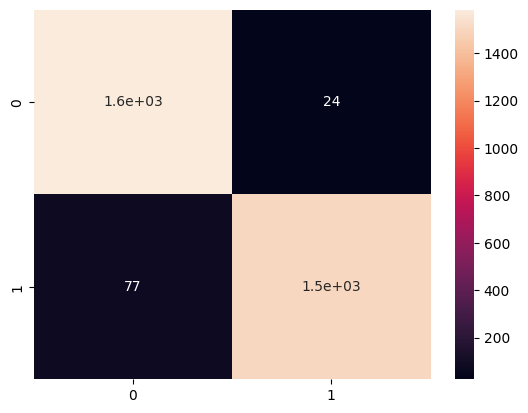

In [163]:
sns.heatmap(cm,annot=True)

In [164]:
from sklearn.metrics import classification_report

In [165]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1608
           1       0.98      0.95      0.97      1577

    accuracy                           0.97      3185
   macro avg       0.97      0.97      0.97      3185
weighted avg       0.97      0.97      0.97      3185



In [166]:
from sklearn.metrics import roc_curve, roc_auc_score

In [167]:
y_proba = clf.predict_proba(X_test)[:, 1]

In [168]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc_score:.2f}")


AUC Score: 0.99


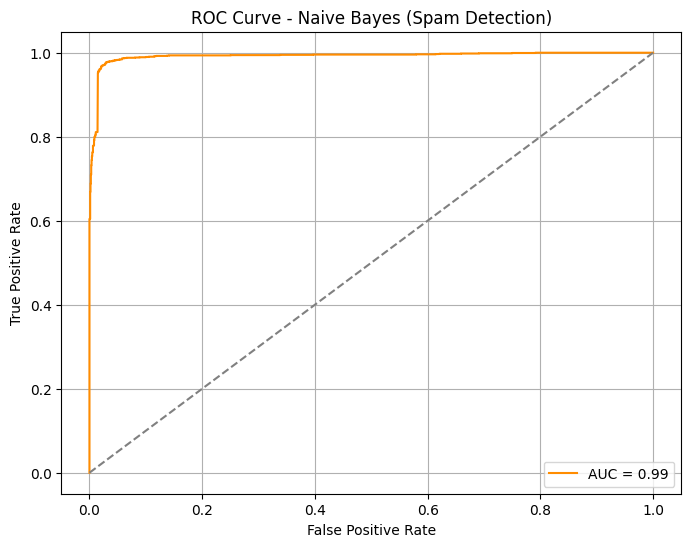

In [169]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - Naive Bayes (Spam Detection)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()